# **1) Read And Prepare CIFAR10 DataSet**

In [ ]:
# get the dataset
!gdown --id 1Y1vgzPvMeVcXSxDfOlCVia7wsU7p8M6g -O CIFAR10.tar.gz 
!tar xzf CIFAR10.tar.gz

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Y1vgzPvMeVcXSxDfOlCVia7wsU7p8M6g
To: /content/CIFAR10.tar.gz
100% 19.8M/19.8M [00:00<00:00, 246MB/s]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import cv2 as cv
import random
from datetime import datetime

# file paths
path1 = glob.glob("/content/CIFAR10/test/airplane/*.jpg")
path2 = glob.glob("/content/CIFAR10/test/automobile/*.jpg")
path3 = glob.glob("/content/CIFAR10/test/bird/*.jpg")
path4 = glob.glob("/content/CIFAR10/test/cat/*.jpg")

path5 = glob.glob("/content/CIFAR10/train/airplane/*.jpg")
path6 = glob.glob("/content/CIFAR10/train/automobile/*.jpg")
path7 = glob.glob("/content/CIFAR10/train/bird/*.jpg")
path8 = glob.glob("/content/CIFAR10/train/cat/*.jpg")

In [ ]:
# Hyperparametrs
number_of_train = 200
number_of_epochs = 10
batch_size = 16
batch_num = 20
learning_rate = 0.3

In [ ]:
# functions

# read images and make an image array
def makeImageList(path):
    cv_img = []
    for img in path:
      n = cv.imread(img)
      n = n[:,:, ::-1]
      cv_img.append(n)
    return cv_img

# convert rgb to gray photos
def rgb2gray(rgb):
    r, g, b = rgb[:, :, :, 0], rgb[:, :, :,1], rgb[:, :, :, 2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

# make the labels for Test data
def makeLabelTest():
  label=np.zeros(16000, dtype=np.uint8)
  label=label.reshape(4000,4)   
  for i in range(4000):
      if(i<1000):
        label[i,0] = 1
      elif(i<2000):
        label[i,1] = 1
      elif(i<3000):
        label[i,2] = 1
      elif(i<4000):
        label[i,3] = 1
  return label

# make the labels for Train data
def makeLabelTrain():
  label=np.zeros(80000, dtype=np.uint8)
  label=label.reshape(20000,4)   
  for i in range(20000):
      if(i<5000):
        label[i,0] = 1
      elif(i<10000):
        label[i,1] = 1
      elif(i<15000):
        label[i,2] = 1
      elif(i<20000):
        label[i,3] = 1
  return label

# shuffle matrix
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

# sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
#make label matrix
testLabel = makeLabelTest()
trainLabel = makeLabelTrain()

In [ ]:
# convert list to arrray
classList1 = makeImageList(path1)+makeImageList(path2)+makeImageList(path3)+makeImageList(path4)
testData = np.asarray(classList1)

classList2 = makeImageList(path5)+makeImageList(path6)+makeImageList(path7)+makeImageList(path8)
trainData = np.asarray(classList2)

# make all photos gray
testData = rgb2gray(testData)
trainData = rgb2gray(trainData)

# divide by 255 to normalize 
testData = np.divide(testData,255)
trainData = np.divide(trainData,255)

# reshape to 1024 nuron
testData = testData.reshape(-1,1024)
trainData = trainData.reshape(-1,1024)

In [ ]:
# shuffle matrixes
testData , testLabel = unison_shuffled_copies(testData, testLabel)
trainData , trainLabel = unison_shuffled_copies(trainData, trainLabel)

In [ ]:
# make a set which contains data and labels
train_set = []
test_set = []
for i in range(trainLabel.T.shape[1]):
  train_set.append((trainData.T[:, i].reshape(1024, 1), trainLabel.T[:, i].reshape(4, 1)))
for i in range(testLabel.T.shape[1]):
  test_set.append((testData[i, :].T.reshape(1024, 1), testLabel[i, :].T.reshape(4, 1)))

# **2) Feed Forward**

In [ ]:
# random the weight and bias of layers
W1 = np.random.normal(size=(16,1024))
W2 = np.random.normal(size=(16, 16))
W3 = np.random.normal(size=(4, 16))
b1 = np.zeros((16, 1))
b2 = np.zeros((16, 1))
b3 = np.zeros((4, 1))

In [ ]:
counter = 0
# find the sigmoid of each node with formula 1/(1+e^(-W+sig last node + bias)
for i in range (number_of_train):
    a0 = trainData[i].reshape(-1,1)
    a1 = sigmoid(W1 @ a0 + b1)
    a2 = sigmoid(W2 @ a1 + b2)
    a3 = sigmoid(W3 @ a2 + b3)

    output = np.argmax(a3)
    label = np.argmax(trainLabel[i],axis=0)
    if(output == label):counter+=1

print('Accuracy: ', counter/number_of_train * 100,"%")


Accuracy:  20.5 %


# **3) Back Propagation**

In [ ]:
# random the weight and bias of layers
W1 = np.random.normal(size=(16,1024))
W2 = np.random.normal(size=(16, 16))
W3 = np.random.normal(size=(4, 16))
b1 = np.zeros((16, 1))
b2 = np.zeros((16, 1))
b3 = np.zeros((4, 1))

total_costs = []

In [ ]:
# get the start time
start = datetime.now()

for epoch in range(number_of_epochs):
    batches = [train_set[x:x+batch_size] for x in range(0, number_of_train, batch_size)]
    for batch in batches:
        # allocate grad_W matrix for each layer
        grad_W1 = np.zeros((16, 1024))
        grad_W2 = np.zeros((16, 16))
        grad_W3 = np.zeros((4, 16))
        # allocate grad_b for each layer
        grad_b1 = np.zeros((16, 1))
        grad_b2 = np.zeros((16, 1))
        grad_b3 = np.zeros((4, 1))
        
        for image, label in batch:
            # compute the output (image is equal to a0)
            a1 = sigmoid(W1 @ image + b1)
            a2 = sigmoid(W2 @ a1 + b2)
            a3 = sigmoid(W3 @ a2 + b3)
            
            # ---- Last layer
            # weight
            for j in range(grad_W3.shape[0]):
                for k in range(grad_W3.shape[1]):
                    grad_W3[j, k] += 2 * (a3[j, 0] - label[j, 0]) * a3[j, 0] * (1 - a3[j, 0]) * a2[k, 0]
            
            # bias
            for j in range(grad_b3.shape[0]):
                    grad_b3[j, 0] += 2 * (a3[j, 0] - label[j, 0]) * a3[j, 0] * (1 - a3[j, 0])
            
            # ---- 3rd layer
            # activation
            delta_3 = np.zeros((16, 1))
            for k in range(16):
                for j in range(4):
                    delta_3[k, 0] += 2 * (a3[j, 0] - label[j, 0]) * a3[j, 0] * (1 - a3[j, 0]) * W3[j, k]
            
            # weight
            for k in range(grad_W2.shape[0]):
                for m in range(grad_W2.shape[1]):
                    grad_W2[k, m] += delta_3[k, 0] * a2[k,0] * (1 - a2[k, 0]) * a1[m, 0]
            
            # bias
            for k in range(grad_b2.shape[0]):
                    grad_b2[k, 0] += delta_3[k, 0] * a2[k, 0] * (1 - a2[k, 0])
                    
            # ---- 2nd layer
            # activation
            delta_2 = np.zeros((16, 1))
            for m in range(16):
                for k in range(16):
                    delta_2[m, 0] += delta_3[k, 0] * a2[k, 0] * (1 - a2[k, 0]) * W2[k, m]
            
            # weight
            for m in range(grad_W1.shape[0]):
                for v in range(grad_W1.shape[1]):
                    grad_W1[m, v] += delta_2[m, 0] * a1[m,0] * (1 - a1[m, 0]) * image[v, 0]
            # bias
            for m in range(grad_b1.shape[0]):
                    grad_b1[m, 0] += delta_2[m, 0] * a1[m, 0] * (1 - a1[m, 0])
        
        W3 = W3 - (learning_rate * (grad_W3 / batch_size))
        W2 = W2 - (learning_rate * (grad_W2 / batch_size))
        W1 = W1 - (learning_rate * (grad_W1 / batch_size))
        
        b3 = b3 - (learning_rate * (grad_b3 / batch_size))
        b2 = b2 - (learning_rate * (grad_b2 / batch_size))
        b1 = b1 - (learning_rate * (grad_b1 / batch_size))
    
    # calculate cost average per epoch
    cost = 0
    for train_data in train_set[:number_of_train]:
        a0 = train_data[0]
        a1 = sigmoid(W1 @ a0 + b1)
        a2 = sigmoid(W2 @ a1 + b2)
        a3 = sigmoid(W3 @ a2 + b3)

        for j in range(4):
            cost += np.power((a3[j, 0] - train_data[1][j,  0]), 2)
            
    cost /= number_of_train
    total_costs.append(cost) 
    
# get the finish time
finish = datetime.now()      

Accuracy:  34.5 %
Duration time:  0:01:48.190711


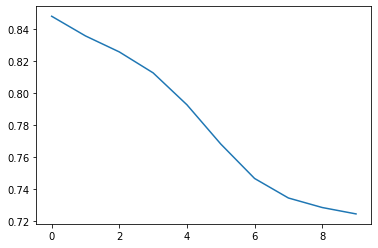

In [ ]:
# show 
epoch_size = [x for x in range(number_of_epochs)]
plt.plot(epoch_size, total_costs)

# find accurancy
correct = 0
for train_data in train_set[:number_of_train]:
    a0 = train_data[0]
    a1 = sigmoid(W1 @ a0 + b1)
    a2 = sigmoid(W2 @ a1 + b2)
    a3 = sigmoid(W3 @ a2 + b3)
    
    predicted = np.where(a3 == np.amax(a3))
    real = np.where(train_data[1] == np.amax(train_data[1]))
    
    if predicted == real:
        correct += 1
        
print('Accuracy: ', correct/number_of_train * 100,"%")
print("Duration time: ", finish-start)

# **4) Vectorization**

In [ ]:
# random the weight and bias of layers
W1 = np.random.normal(size=(16,1024))
W2 = np.random.normal(size=(16, 16))
W3 = np.random.normal(size=(4, 16))
b1 = np.zeros((16, 1))
b2 = np.zeros((16, 1))
b3 = np.zeros((4, 1))

total_costs = []
number_of_epochs = 60

In [ ]:
# get the start time
start = datetime.now()

for epoch in range(number_of_epochs):
    batches = [train_set[x:x+batch_size] for x in range(0, number_of_train, batch_size)]
    for batch in batches:
        # allocate grad_W matrix for each layer
        grad_W1 = np.zeros((16, 1024))
        grad_W2 = np.zeros((16, 16))
        grad_W3 = np.zeros((4, 16))
        # allocate grad_b for each layer
        grad_b1 = np.zeros((16, 1))
        grad_b2 = np.zeros((16, 1))
        grad_b3 = np.zeros((4, 1))
        
        for image, label in batch:
            # compute the output (image is equal to a0)
            a1 = sigmoid(W1 @ image + b1)
            a2 = sigmoid(W2 @ a1 + b2)
            a3 = sigmoid(W3 @ a2 + b3)
            
            # ---- Last layer
            # weight
            grad_W3 += (2 * (a3 - label) * a3 * (1 - a3)) @ np.transpose(a2)
            
            # bias
            grad_b3 += 2 * (a3 - label) * a3 * (1 - a3)
            
            # ---- 3rd layer
            # activation
            delta_3 = np.zeros((16, 1))
            delta_3 += np.transpose(W3) @ (2 *(a3 - label) * (a3 * (1 - a3)))
            
            # weight
            grad_W2 += (a2 * (1 - a2) * delta_3) @ np.transpose(a1)
            
            # bias
            grad_b2 += delta_3 * a2 * (1 - a2)
                    
            # ---- 2nd layer
            # activation
            delta_2 = np.zeros((16, 1))
            delta_2 += np.transpose(W2) @ delta_3 * a2 * (1 - a2)
            
            # weight
            grad_W1 += (delta_2 * a1 * (1 - a1)) @ np.transpose(image)
                    
            # bias
            grad_b1 += delta_2 * a1 * (1 - a1)
        
        W3 = W3 - (learning_rate * (grad_W3 / batch_size))
        W2 = W2 - (learning_rate * (grad_W2 / batch_size))
        W1 = W1 - (learning_rate * (grad_W1 / batch_size))
        
        b3 = b3 - (learning_rate * (grad_b3 / batch_size))
        b2 = b2 - (learning_rate * (grad_b2 / batch_size))
        b1 = b1 - (learning_rate * (grad_b1 / batch_size))
    
      # calculate cost average per epoch
    cost = 0
    for train_data in train_set[:number_of_train]:
        a0 = train_data[0]
        a1 = sigmoid(W1 @ a0 + b1)
        a2 = sigmoid(W2 @ a1 + b2)
        a3 = sigmoid(W3 @ a2 + b3)

        for j in range(4):
            cost += np.power((a3[j, 0] - train_data[1][j,  0]), 2)
            
    cost /= number_of_train
    total_costs.append(cost)

# get the finish time
finish = datetime.now()  

Accuracy:  56.49999999999999 %
Duration time:  0:00:04.260463


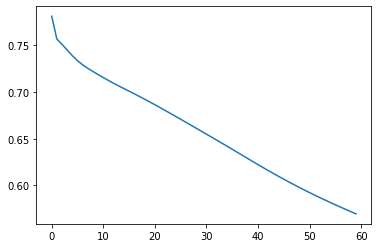

In [ ]:
epoch_size = [x for x in range(number_of_epochs)]
plt.plot(epoch_size, total_costs)
correct = 0
for train_data in train_set[:number_of_train]:
    a0 = train_data[0]
    a1 = sigmoid(W1 @ a0 + b1)
    a2 = sigmoid(W2 @ a1 + b2)
    a3 = sigmoid(W3 @ a2 + b3)
    
    predicted = np.where(a3 == np.amax(a3))
    real = np.where(train_data[1] == np.amax(train_data[1]))
    
    if predicted == real:
        correct += 1
        
print('Accuracy: ', correct/number_of_train * 100,"%")
print("Duration time: ", finish-start)


# **5) Testing the model**

In [85]:
# random the weight and bias of layers
W1 = np.random.normal(size=(16,1024))
W2 = np.random.normal(size=(16, 16))
W3 = np.random.normal(size=(4, 16))
b1 = np.zeros((16, 1))
b2 = np.zeros((16, 1))
b3 = np.zeros((4, 1))

total_costs = []
batch_size = 16
learning_rate = 0.3
number_of_epochs = 60

In [86]:
# get the start time
start = datetime.now()

for epoch in range(number_of_epochs):
    np.random.shuffle(train_set)
    batches = [train_set[x:x+batch_size] for x in range(0, 8000, batch_size)]
    for batch in batches:
        # allocate grad_W matrix for each layer
        grad_W1 = np.zeros((16, 1024))
        grad_W2 = np.zeros((16, 16))
        grad_W3 = np.zeros((4, 16))
        # allocate grad_b for each layer
        grad_b1 = np.zeros((16, 1))
        grad_b2 = np.zeros((16, 1))
        grad_b3 = np.zeros((4, 1))
        
        for image, label in batch:
            # compute the output (image is equal to a0)
            a1 = sigmoid(W1 @ image + b1)
            a2 = sigmoid(W2 @ a1 + b2)
            a3 = sigmoid(W3 @ a2 + b3)
            
            # ---- Last layer
            # weight
            grad_W3 += (2 * (a3 - label) * a3 * (1 - a3)) @ np.transpose(a2)
            
            # bias
            grad_b3 += 2 * (a3 - label) * a3 * (1 - a3)
            
            # ---- 3rd layer
            # activation
            delta_3 = np.zeros((16, 1))
            delta_3 += np.transpose(W3) @ (2 *(a3 - label) * (a3 * (1 - a3)))
            
            # weight
            grad_W2 += (a2 * (1 - a2) * delta_3) @ np.transpose(a1)
            
            # bias
            grad_b2 += delta_3 * a2 * (1 - a2)
                    
            # ---- 2nd layer
            # activation
            delta_2 = np.zeros((16, 1))
            delta_2 += np.transpose(W2) @ delta_3 * a2 * (1 - a2)
            
            # weight
            grad_W1 += (delta_2 * a1 * (1 - a1)) @ np.transpose(image)
                    
            # bias
            grad_b1 += delta_2 * a1 * (1 - a1)
        
        W3 = W3 - (learning_rate * (grad_W3 / batch_size))
        W2 = W2 - (learning_rate * (grad_W2 / batch_size))
        W1 = W1 - (learning_rate * (grad_W1 / batch_size))
        
        b3 = b3 - (learning_rate * (grad_b3 / batch_size))
        b2 = b2 - (learning_rate * (grad_b2 / batch_size))
        b1 = b1 - (learning_rate * (grad_b1 / batch_size))

    # calculate cost average per epoch
    cost = 0
    for train_data in train_set[0:8000]:
        a0 = train_data[0]
        a1 = sigmoid(W1 @ a0 + b1)
        a2 = sigmoid(W2 @ a1 + b2)
        a3 = sigmoid(W3 @ a2 + b3)

        for j in range(4):
            cost += np.power((a3[j, 0] - train_data[1][j,  0]), 2)
            
    cost /= 8000
    total_costs.append(cost)   
     
# get the finish time
finish = datetime.now()  

Accuracy For Train Data: 53.6875
Duration time:  0:02:54.113695


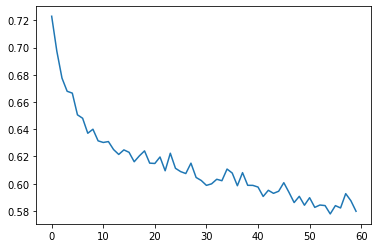

In [87]:
epoch_size = [x for x in range(number_of_epochs)]
plt.plot(epoch_size, total_costs)
correct = 0
for test_data in train_set[0:8000]:
    a0 = test_data[0]
    a1 = sigmoid(W1 @ a0 + b1)
    a2 = sigmoid(W2 @ a1 + b2)
    a3 = sigmoid(W3 @ a2 + b3)
    
    predicted = np.where(a3 == np.amax(a3))
    real = np.where(test_data[1] == np.amax(test_data[1]))
    
    if predicted == real:
        correct += 1
        
print(f"Accuracy For Train Data: {correct/8000 *100 }")
print("Duration time: ", finish-start)

In [88]:
correct = 0
for test_data in test_set:
    a0 = test_data[0]
    a1 = sigmoid(W1 @ a0 + b1)
    a2 = sigmoid(W2 @ a1 + b2)
    a3 = sigmoid(W3 @ a2 + b3)
    
    predicted = np.where(a3 == np.amax(a3))
    real = np.where(test_data[1] == np.amax(test_data[1]))
    
    if predicted == real:
        correct += 1
print(f"Accuracy For Test Data: {correct/4000 *100 }")

Accuracy For Test Data: 51.475
